In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
def take_log(df):
    
    # take log of data
    df['Adj Close'] = np.log(df['Adj Close'])
    
    return df

In [3]:
def get_deltas(df):
    vals = df['Adj Close']
    deltas = [vals[i+1] - vals[i] for i in range(len(vals)-1)]
    deltas.append(np.nan)
    df['Adj Close'] = deltas
    return df, deltas

In [4]:
def scale_data(df):
    scaler = MinMaxScaler(feature_range = (0, 1))
    df['Adj Close'] = scaler.fit_transform(df[['Adj Close']])
    return df

In [5]:
# raw data file path
RAW_DATA_FILE_PATH = "~/springboard1/capstone2/TimeSeries/data/raw/raw.csv"

# read csv data from
raw_df = pd.read_csv(RAW_DATA_FILE_PATH, index_col=0, parse_dates=['Date'])

# inspect data
raw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...
2020-03-10,1260.000000,1281.150024,1218.770020,1280.390015,1280.390015,2611400
2020-03-11,1249.699951,1260.959961,1196.069946,1215.410034,1215.410034,2608500
2020-03-12,1126.000000,1193.869995,1113.300049,1114.910034,1114.910034,4226700


In [6]:
# slice Adj Close column
adj_close_df = raw_df.iloc[:,4:5]
adj_close_df

,Adj Close
Date,
2004-08-19,49.982655
2004-08-20,53.952770
2004-08-23,54.495735
2004-08-24,52.239193
2004-08-25,52.802086
...,...
2020-03-10,1280.390015
2020-03-11,1215.410034
2020-03-12,1114.910034


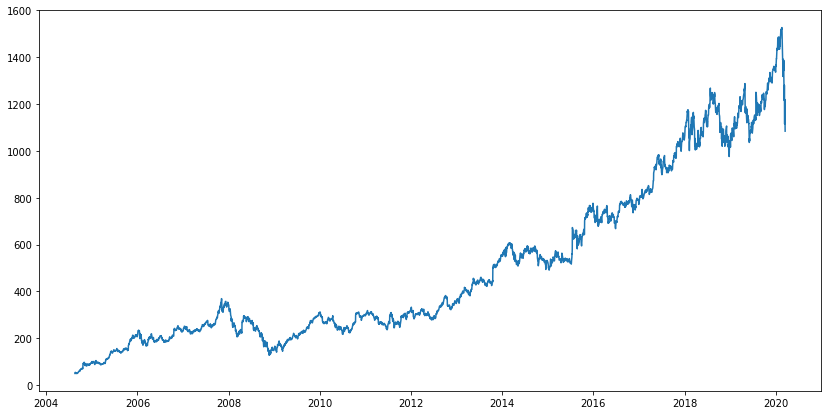

In [7]:
# plot adjusted close
_ = plt.figure(figsize=(14,7))
_ = plt.plot(adj_close_df)
plt.show()

In [8]:
log_scaled_adj_close = take_log(adj_close_df)
log_scaled_adj_close, deltas = get_deltas(adj_close_df)
log_scaled_adj_close = scale_data(adj_close_df)

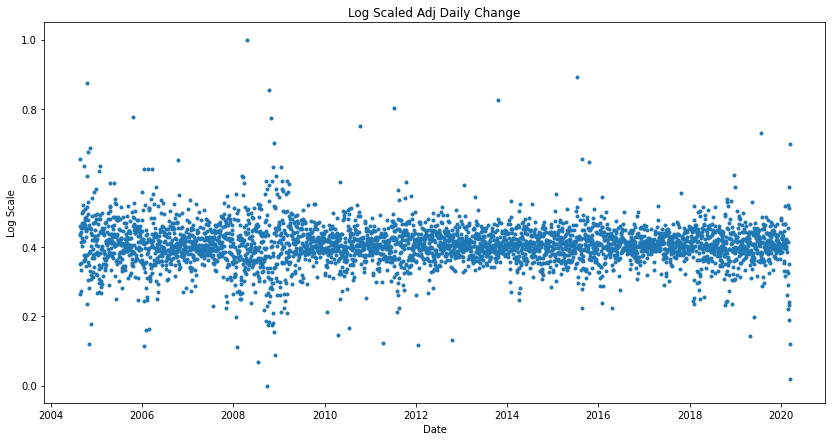

In [9]:
# plot log scaled adjusted close
_ = plt.figure(figsize=(14,7))
_ = plt.plot(log_scaled_adj_close, linestyle='None', marker='.')
_ = plt.title('Log Scaled Adj Daily Change')
_ = plt.xlabel('Date')
_ = plt.ylabel('Log Scale')
plt.show()
    

/home/alhalarewicz/anaconda3/envs/TimeSeries/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alhalarewicz/anaconda3/envs/TimeSeries/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


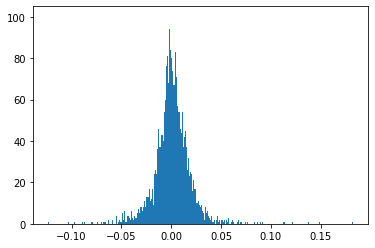

In [10]:
_ = plt.hist(deltas, bins = 500)

In [11]:
# see 20:30 for structuring time series data for 5 trailing days

def create_previous_days(df, col_name):
    
    """
    Create columns containing the stock price for each of the previous five days.
    
    Params
    ------
    DataFrame containing stock prices for consecutive days
    
    Return
    ------
    A times series formatted DataFrame
    """
    
    back_1 = np.nan
    back_2 = np.nan
    back_3 = np.nan
    back_4 = np.nan
    back_5 = np.nan
    
    back_1_col = []
    back_2_col = []
    back_3_col = []
    back_4_col = []
    back_5_col = []
    
    for today in df[col_name]:
        
        # append previous values
        back_1_col.append(back_1)
        back_2_col.append(back_2)
        back_3_col.append(back_3)
        back_4_col.append(back_4)
        back_5_col.append(back_5)
        
        # set values for next day to step forward
        back_5 = back_4
        back_4 = back_3
        back_3 = back_2
        back_2 = back_1
        back_1 = today
        
    # append columns to time_series dataframe
    df['back_5'] = back_5_col
    df['back_4'] = back_4_col
    df['back_3'] = back_3_col
    df['back_2'] = back_2_col
    df['back_1'] = back_1_col

    # order columns chronologically
    df = df[['back_5', 'back_4', 'back_3', 'back_2', 'back_1', col_name]]
        
    return df
    
        
        
previous_df = create_previous_days(log_scaled_adj_close, 'Adj Close')
previous_df

,back_5,back_4,back_3,back_2,back_1,Adj Close
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,0.653796
2004-08-20,NaN,NaN,NaN,NaN,0.653796,0.436492
2004-08-23,NaN,NaN,NaN,0.653796,0.436492,0.265374
2004-08-24,NaN,NaN,0.653796,0.436492,0.265374,0.438796
2004-08-25,NaN,0.653796,0.436492,0.265374,0.438796,0.462158
...,...,...,...,...,...,...
2020-03-10,0.511994,0.240498,0.352157,0.188011,0.573728,0.233331
2020-03-11,0.240498,0.352157,0.188011,0.573728,0.233331,0.121359
2020-03-12,0.352157,0.188011,0.573728,0.233331,0.121359,0.697711


In [12]:
def create_future_days(df, col_name):
    
    df = df.sort_index(ascending=False)
    
    next_1 = np.nan
    next_2 = np.nan
    next_3 = np.nan
    next_4 = np.nan
    next_5 = np.nan
    
    next_1_col = []
    next_2_col = []
    next_3_col = []
    next_4_col = []
    next_5_col = []
    
    for today in df[col_name]:
        
        next_1_col.append(next_1)
        next_2_col.append(next_2)
        next_3_col.append(next_3)
        next_4_col.append(next_4)
        next_5_col.append(next_5)
        
        next_5 = next_4
        next_4 = next_3
        next_3 = next_2
        next_2 = next_1
        next_1 = today
        
    df['next_1'] = next_1_col
    df['next_2'] = next_2_col
    df['next_3'] = next_3_col
    df['next_4'] = next_4_col
    df['next_5'] = next_5_col
    
    df = df.sort_index(ascending=True)
    
    return df

future_df = create_future_days(previous_df, 'Adj Close')
future_df

,back_5,back_4,back_3,back_2,back_1,Adj Close,next_1,next_2,next_3,next_4,next_5
Date,,,,,,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931
2004-08-20,NaN,NaN,NaN,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931,0.273576
2004-08-23,NaN,NaN,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931,0.273576,0.415257
2004-08-24,NaN,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931,0.273576,0.415257,0.335266
2004-08-25,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931,0.273576,0.415257,0.335266,0.444596
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-10,0.511994,0.240498,0.352157,0.188011,0.573728,0.233331,0.121359,0.697711,0.018761,NaN,NaN
2020-03-11,0.240498,0.352157,0.188011,0.573728,0.233331,0.121359,0.697711,0.018761,NaN,NaN,NaN
2020-03-12,0.352157,0.188011,0.573728,0.233331,0.121359,0.697711,0.018761,NaN,NaN,NaN,NaN


In [13]:
def create_time_series(df, col_name='Adj Close'):
    df = create_previous_days(df, col_name)
    df = create_future_days(df, col_name)
    return df

time_series_df = create_time_series(log_scaled_adj_close, 'Adj Close')
time_series_df

,back_5,back_4,back_3,back_2,back_1,Adj Close,next_1,next_2,next_3,next_4,next_5
Date,,,,,,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931
2004-08-20,NaN,NaN,NaN,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931,0.273576
2004-08-23,NaN,NaN,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931,0.273576,0.415257
2004-08-24,NaN,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931,0.273576,0.415257,0.335266
2004-08-25,NaN,0.653796,0.436492,0.265374,0.438796,0.462158,0.349931,0.273576,0.415257,0.335266,0.444596
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-10,0.511994,0.240498,0.352157,0.188011,0.573728,0.233331,0.121359,0.697711,0.018761,NaN,NaN
2020-03-11,0.240498,0.352157,0.188011,0.573728,0.233331,0.121359,0.697711,0.018761,NaN,NaN,NaN
2020-03-12,0.352157,0.188011,0.573728,0.233331,0.121359,0.697711,0.018761,NaN,NaN,NaN,NaN


In [15]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3920 entries, 2004-08-19 to 2020-03-16
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   back_5     3915 non-null   float64
 1   back_4     3916 non-null   float64
 2   back_3     3917 non-null   float64
 3   back_2     3918 non-null   float64
 4   back_1     3919 non-null   float64
 5   Adj Close  3919 non-null   float64
 6   next_1     3918 non-null   float64
 7   next_2     3917 non-null   float64
 8   next_3     3916 non-null   float64
 9   next_4     3915 non-null   float64
 10  next_5     3914 non-null   float64
dtypes: float64(11)
memory usage: 367.5 KB


In [16]:
time_series_df.to_csv('../data/processed/time_series.csv')